# Theory

In [ ]:
#Q1. Can we use Bagging for regression problems?

# Yes, Bagging can be used for regression problems.
# A Bagging Regressor is an ensemble method that aggregates predictions from multiple base regressors (e.g., Decision Trees) to reduce variance and improve accuracy.


In [ ]:
#Q2. **What is the difference between multiple model training and single model training?**

# - Single model training involves training a single predictive model on the dataset.
# - Multiple model training (ensemble learning) combines multiple models to make predictions, improving robustness, accuracy, and reducing overfitting.


In [ ]:
#Q3. Explain the concept of feature randomness in Random Forest.


# In Random Forest, feature randomness means that at each split in a Decision Tree, only a random subset of features is considered rather than the entire feature set.
# This increases diversity among trees and reduces correlation, improving generalization.


In [ ]:
#Q4. What is OOB (Out-of-Bag) Score?


# The OOB score is an internal validation metric in Bagging-based models like Random Forest.
# Since each tree in the ensemble is trained using bootstrap samples, the data points not included in a tree (out-of-bag samples) are used to evaluate the model’s performance.


In [ ]:
#Q5. How can you measure the importance of features in a Random Forest model?


# Feature importance in a Random Forest can be measured using:
#    - Gini importance (decrease in impurity)
#    - Permutation importance (change in accuracy when a feature is shuffled)


In [ ]:
#Q6. Explain the working principle of a Bagging Classifier.


# A Bagging Classifier creates multiple subsets of the training data using bootstrap sampling,
# trains a separate model on each subset, and aggregates their predictions (e.g., majority voting for classification).


In [ ]:
#Q7. How do you evaluate a Bagging Classifier’s performance?

# It can be evaluated using metrics like accuracy, precision, recall, F1-score, AUC-ROC, and cross-validation.


In [ ]:
#Q8. How does a Bagging Regressor work?

# A Bagging Regressor trains multiple regression models on bootstrap samples and averages their predictions to reduce variance and improve accuracy.


In [ ]:
#Q9. What is the main advantage of ensemble techniques?

# Ensemble techniques improve predictive performance by reducing variance, bias, and improving generalization.


In [ ]:
#Q10. What is the main challenge of ensemble methods?


# The main challenges include computational complexity, difficulty in interpretation, and the risk of overfitting if not properly tuned.


In [ ]:
#Q11. Explain the key idea behind ensemble techniques.

# Ensemble techniques combine multiple models to make better predictions than individual models by reducing bias and variance.


In [ ]:
#Q12. What is a Random Forest Classifier?


# A Random Forest Classifier is an ensemble learning method that constructs multiple Decision Trees and combines their predictions to improve classification accuracy.


In [ ]:
#Q13. What are the main types of ensemble techniques?

    # - Bagging (Bootstrap Aggregating)
    # - Boosting (e.g., AdaBoost, Gradient Boosting)
    # - Stacking
    # - Voting/Averaging

In [ ]:
#Q14. What is ensemble learning in machine learning?

# Ensemble learning is a method that combines multiple models to produce a more robust predictive model.


In [ ]:
#Q15. When should we avoid using ensemble methods?

    # Ensemble methods should be avoided when:
    # - The dataset is small, making a single model sufficient.
    # - Interpretability is crucial.
    # - Computational resources are limited.

In [ ]:
#Q16. How does Bagging help in reducing overfitting?

# Bagging reduces overfitting by training multiple models on different bootstrap samples, averaging predictions, and reducing variance.


In [ ]:
#Q17. Why is Random Forest better than a single Decision Tree?

# Random Forest is better because it reduces overfitting, improves accuracy, and generalizes better by averaging multiple Decision Trees.


In [ ]:
#Q18. What is the role of bootstrap sampling in Bagging?

# Bootstrap sampling creates diverse training datasets by randomly selecting data points with replacement, leading to less correlation between models and better generalization.


In [ ]:
#Q19. What are some real-world applications of ensemble techniques?


# - Fraud detection
# - Medical diagnosis
# - Stock price prediction
# - Image recognition
# - Recommendation systems

In [ ]:
#Q20. What is the difference between Bagging and Boosting?

# - Bagging reduces variance by training models independently on random subsets.
# - Boosting reduces bias by sequentially training models, where each model corrects the errors of the previous one.



# Practical

In [ ]:
#Q21 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model and parameters for tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Best Params: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Best Params: {'max_depth': None, 'n_estimators': 100}
Accuracy: 1.00


In [ ]:
#Q22 Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train a Bagging Regressor using Decision Trees
base_regressor = DecisionTreeRegressor()
bagging_regressor = BaggingRegressor(estimator=base_regressor, n_estimators=50, random_state=42)
bagging_regressor.fit(X_train, y_train)

# Predict and evaluate the Bagging Regressor
y_pred = bagging_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) of Bagging Regressor:", mse)


Mean Squared Error (MSE) of Bagging Regressor: 0.2572988359842641


In [ ]:
#Q23  Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = model.feature_importances_
features = breast_cancer.feature_names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print("Feature Importance Scores:")
print(importance_df)

# Sort by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
print("\nSorted Feature Importance Scores:")
print(importance_df_sorted)


Feature Importance Scores:
                    Feature  Importance
0               mean radius    0.048703
1              mean texture    0.013591
2            mean perimeter    0.053270
3                 mean area    0.047555
4           mean smoothness    0.007285
5          mean compactness    0.013944
6            mean concavity    0.068001
7       mean concave points    0.106210
8             mean symmetry    0.003770
9    mean fractal dimension    0.003886
10             radius error    0.020139
11            texture error    0.004724
12          perimeter error    0.011303
13               area error    0.022407
14         smoothness error    0.004271
15        compactness error    0.005253
16          concavity error    0.009386
17     concave points error    0.003513
18           symmetry error    0.004018
19  fractal dimension error    0.005321
20             worst radius    0.077987
21            worst texture    0.021749
22          worst perimeter    0.067115
23           

In [ ]:
#Q24 Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train a Single Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Predict and evaluate the Decision Tree Regressor
y_pred_tree = tree_regressor.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error (MSE) of Decision Tree Regressor:", mse_tree)

# Train a Random Forest Regressor
forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(X_train, y_train)

# Predict and evaluate the Random Forest Regressor
y_pred_forest = forest_regressor.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
print("Mean Squared Error (MSE) of Random Forest Regressor:", mse_forest)

# Compare the MSEs
print(f"MSE of Decision Tree Regressor: {mse_tree:.2f}")
print(f"MSE of Random Forest Regressor: {mse_forest:.2f}")


Mean Squared Error (MSE) of Decision Tree Regressor: 0.495235205629094
Mean Squared Error (MSE) of Random Forest Regressor: 0.2553684927247781
MSE of Decision Tree Regressor: 0.50
MSE of Random Forest Regressor: 0.26


In [ ]:
#Q25 Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier with OOB score enabled
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(X_train, y_train)

# Compute the OOB score
oob_score = model.oob_score_
print("Out-of-Bag (OOB) Score:", oob_score)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print("Accuracy on test set:", accuracy)


Out-of-Bag (OOB) Score: 0.9560439560439561
Accuracy on test set: 0.9649122807017544


In [ ]:
#Q26  Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Bagging Classifier using SVM as base estimator
base_estimator = SVC()
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict and evaluate the Bagging Classifier
y_pred = bagging_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bagging Classifier with SVM base estimator:", accuracy)


Accuracy of Bagging Classifier with SVM base estimator: 0.9473684210526315


In [ ]:
#Q27  Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# List of different numbers of trees (estimators) to try
n_estimators_list = [10, 50, 100, 200]

# Dictionary to store accuracies for each number of trees
accuracy_results = {}

# Train and evaluate Random Forest Classifier for each number of trees
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[n_estimators] = accuracy
    print(f"Accuracy with {n_estimators} trees: {accuracy:.4f}")

# Print accuracy results
print("\nAccuracy Results:")
for n_estimators, accuracy in accuracy_results.items():
    print(f"{n_estimators} trees: {accuracy:.4f}")


Accuracy with 10 trees: 0.9561
Accuracy with 50 trees: 0.9649
Accuracy with 100 trees: 0.9649
Accuracy with 200 trees: 0.9649

Accuracy Results:
10 trees: 0.9561
50 trees: 0.9649
100 trees: 0.9649
200 trees: 0.9649


In [ ]:
#Q28 Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Bagging Classifier using Logistic Regression as base estimator
base_estimator = LogisticRegression(max_iter=10000)
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict probabilities of the positive class
y_pred_proba = bagging_classifier.predict_proba(X_test)[:, 1]

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score of Bagging Classifier with Logistic Regression base estimator:", auc_score)


AUC Score of Bagging Classifier with Logistic Regression base estimator: 0.99737962659679


In [ ]:
#Q29 Train a Random Forest Regressor and analyze feature importance scores

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the California Housing dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Get feature importance scores
feature_importances = model.feature_importances_
features = data.feature_names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
print("Feature Importance Scores:")
print(importance_df)

# Sort by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
print("\nSorted Feature Importance Scores:")
print(importance_df_sorted)


Mean Squared Error (MSE): 0.2553684927247781
Feature Importance Scores:
      Feature  Importance
0      MedInc    0.524871
1    HouseAge    0.054593
2    AveRooms    0.044272
3   AveBedrms    0.029606
4  Population    0.030650
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629

Sorted Feature Importance Scores:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


In [ ]:
#Q30 Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Bagging Classifier using Decision Tree as base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Train a Random Forest Classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

# Predict and evaluate the Bagging Classifier
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy of Bagging Classifier:", accuracy_bagging)

# Predict and evaluate the Random Forest Classifier
y_pred_random_forest = random_forest_classifier.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Accuracy of Random Forest Classifier:", accuracy_random_forest)

# Compare the accuracies
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.4f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_random_forest:.4f}")


Accuracy of Bagging Classifier: 0.956140350877193
Accuracy of Random Forest Classifier: 0.9649122807017544
Accuracy of Bagging Classifier: 0.9561
Accuracy of Random Forest Classifier: 0.9649


In [ ]:
#Q31 Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict and evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best hyperparameters found: ", best_params)
print("Accuracy of the best model: ", accuracy)


Best hyperparameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of the best model:  0.9649122807017544


In [ ]:
#Q32 Train a Bagging Regressor with different numbers of base estimators and compare performance

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# List of different numbers of base estimators to try
n_estimators_list = [10, 50, 100, 200]

# Dictionary to store MSE for each number of base estimators
mse_results = {}

# Train and evaluate Bagging Regressor for each number of base estimators
for n_estimators in n_estimators_list:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[n_estimators] = mse
    print(f"MSE with {n_estimators} base estimators: {mse:.4f}")

# Print MSE results
print("\nMSE Results:")
for n_estimators, mse in mse_results.items():
    print(f"{n_estimators} base estimators: {mse:.4f}")


MSE with 10 base estimators: 0.2824
MSE with 50 base estimators: 0.2573
MSE with 100 base estimators: 0.2559
MSE with 200 base estimators: 0.2541

MSE Results:
10 base estimators: 0.2824
50 base estimators: 0.2573
100 base estimators: 0.2559
200 base estimators: 0.2541


In [ ]:
#Q33 Train a Random Forest Classifier and analyze misclassified samples

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Identify misclassified samples
misclassified_samples = X_test[y_test != y_pred]
misclassified_true_labels = y_test[y_test != y_pred]
misclassified_pred_labels = y_pred[y_test != y_pred]

print("Number of misclassified samples:", len(misclassified_samples))
print("Misclassified samples' true labels:", misclassified_true_labels)
print("Misclassified samples' predicted labels:", misclassified_pred_labels)

# Optional: Analyzing the misclassified samples
import pandas as pd

# Create a DataFrame for better visualization of misclassified samples
misclassified_df = pd.DataFrame(misclassified_samples, columns=breast_cancer.feature_names)
misclassified_df['True Label'] = misclassified_true_labels
misclassified_df['Predicted Label'] = misclassified_pred_labels

print("\nMisclassified Samples DataFrame:")
print(misclassified_df)


Accuracy of Random Forest Classifier: 0.9649122807017544
Number of misclassified samples: 4
Misclassified samples' true labels: [1 0 0 0]
Misclassified samples' predicted labels: [0 1 1 1]

Misclassified Samples DataFrame:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.05069         0.1662   
2           0.12790         0.09789              0.05246         0.1908   
3           0.09947         0.12040              0.04938         0.2075   

   mean fractal dime

In [ ]:
#Q34 Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Bagging Classifier using Decision Tree as base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Train a single Decision Tree Classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Predict and evaluate the Bagging Classifier
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Accuracy of Bagging Classifier:", accuracy_bagging)

# Predict and evaluate the Decision Tree Classifier
y_pred_tree = tree_classifier.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy of Decision Tree Classifier:", accuracy_tree)

# Compare the accuracies
print(f"Accuracy of Bagging Classifier: {accuracy_bagging:.4f}")
print(f"Accuracy of Decision Tree Classifier: {accuracy_tree:.4f}")


Accuracy of Bagging Classifier: 0.956140350877193
Accuracy of Decision Tree Classifier: 0.9298245614035088
Accuracy of Bagging Classifier: 0.9561
Accuracy of Decision Tree Classifier: 0.9298


In [ ]:
#Q35 Train a Random Forest Classifier and visualize the confusion matrix

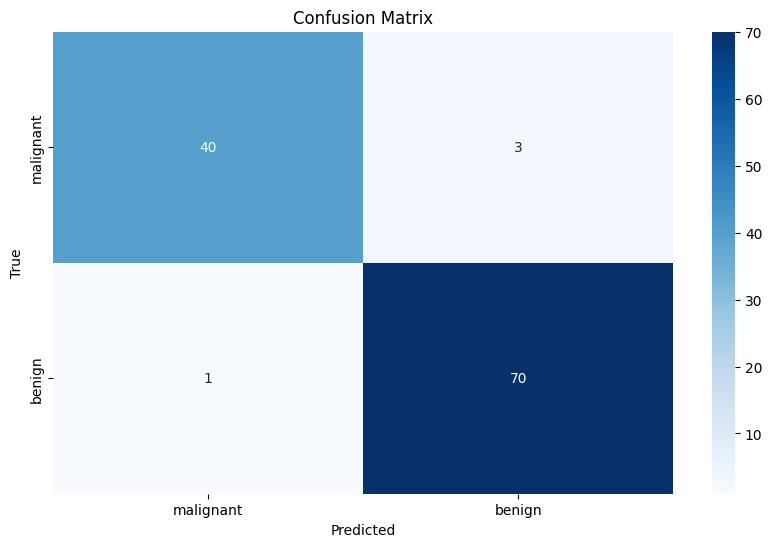

Accuracy of Random Forest Classifier: 0.9649122807017544


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)


In [ ]:
#Q36 Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Define base estimators
estimators = [
    ('decision_tree', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),
    ('logistic_regression', LogisticRegression(max_iter=10000))
]

# Define the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Predict and evaluate the Stacking Classifier
y_pred_stacking = stacking_classifier.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy of Stacking Classifier:", accuracy_stacking)

# Train and evaluate individual classifiers for comparison
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of Decision Tree Classifier:", accuracy_dt)

# SVM
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM Classifier:", accuracy_svm)

# Logistic Regression
lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression Classifier:", accuracy_lr)

# Compare the accuracies
print(f"Accuracy of Stacking Classifier: {accuracy_stacking:.4f}")
print(f"Accuracy of Decision Tree Classifier: {accuracy_dt:.4f}")
print(f"Accuracy of SVM Classifier: {accuracy_svm:.4f}")
print(f"Accuracy of Logistic Regression Classifier: {accuracy_lr:.4f}")


Accuracy of Stacking Classifier: 0.956140350877193
Accuracy of Decision Tree Classifier: 0.9298245614035088
Accuracy of SVM Classifier: 0.9473684210526315
Accuracy of Logistic Regression Classifier: 0.956140350877193
Accuracy of Stacking Classifier: 0.9561
Accuracy of Decision Tree Classifier: 0.9298
Accuracy of SVM Classifier: 0.9474
Accuracy of Logistic Regression Classifier: 0.9561


In [ ]:
#Q37  Train a Random Forest Classifier and print the top 5 most important features

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = model.feature_importances_
features = breast_cancer.feature_names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance and get the top 5 features
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
top_5_features = importance_df_sorted.head(5)

print("Top 5 Most Important Features:")
print(top_5_features)


Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [ ]:
#Q38 Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Bagging Classifier using Decision Tree as base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model using Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Precision: 0.96
Recall: 0.96
F1-Score: 0.96
Accuracy: 0.96


In [ ]:
#Q39 Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

Accuracy with max_depth=None: 0.9649
Accuracy with max_depth=5: 0.9649
Accuracy with max_depth=10: 0.9649
Accuracy with max_depth=15: 0.9649
Accuracy with max_depth=20: 0.9649
Accuracy with max_depth=25: 0.9649


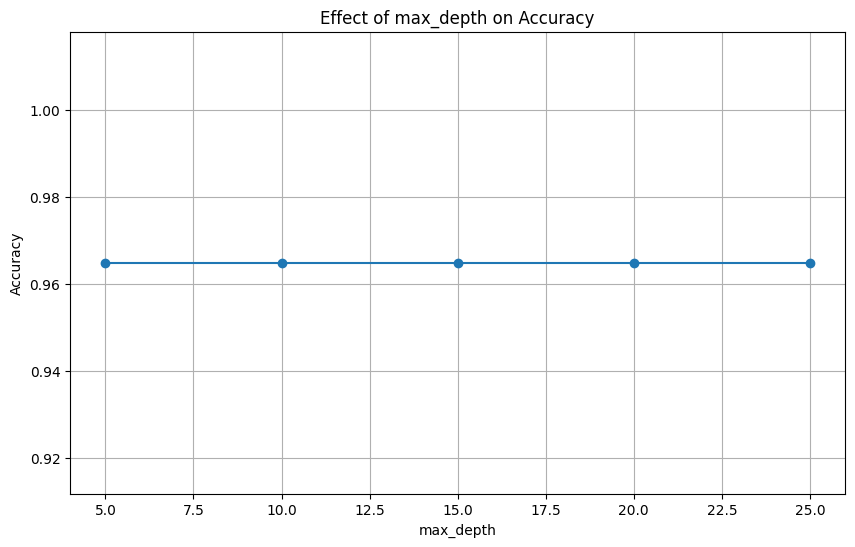


Accuracy Results:
max_depth=None: 0.9649
max_depth=5: 0.9649
max_depth=10: 0.9649
max_depth=15: 0.9649
max_depth=20: 0.9649
max_depth=25: 0.9649


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# List of different max_depth values to try
max_depth_list = [None, 5, 10, 15, 20, 25]

# Dictionary to store accuracies for each max_depth value
accuracy_results = {}

# Train and evaluate Random Forest Classifier for each max_depth value
for max_depth in max_depth_list:
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[max_depth] = accuracy
    print(f"Accuracy with max_depth={max_depth}: {accuracy:.4f}")

# Plot the effect of max_depth on accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_list, list(accuracy_results.values()), marker='o')
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("Effect of max_depth on Accuracy")
plt.grid(True)
plt.show()

# Print accuracy results
print("\nAccuracy Results:")
for max_depth, accuracy in accuracy_results.items():
    print(f"max_depth={max_depth}: {accuracy:.4f}")


In [ ]:
#Q40 Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
data = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Dictionary to store MSE for each base estimator
mse_results = {}

# Train and evaluate Bagging Regressor using Decision Tree as base estimator
dt_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_results['DecisionTree'] = mse_dt
print(f"MSE of Bagging Regressor with Decision Tree: {mse_dt:.4f}")

# Train and evaluate Bagging Regressor using KNeighbors as base estimator
knn_model = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=50, random_state=42)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_results['KNeighbors'] = mse_knn
print(f"MSE of Bagging Regressor with KNeighbors: {mse_knn:.4f}")

# Print MSE results
print("\nMSE Results:")
for estimator, mse in mse_results.items():
    print(f"{estimator} base estimator: {mse:.4f}")


MSE of Bagging Regressor with Decision Tree: 0.2573
MSE of Bagging Regressor with KNeighbors: 1.0763

MSE Results:
DecisionTree base estimator: 0.2573
KNeighbors base estimator: 1.0763


In [ ]:
#Q41 Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

ROC-AUC Score of Random Forest Classifier: 0.9952505732066819


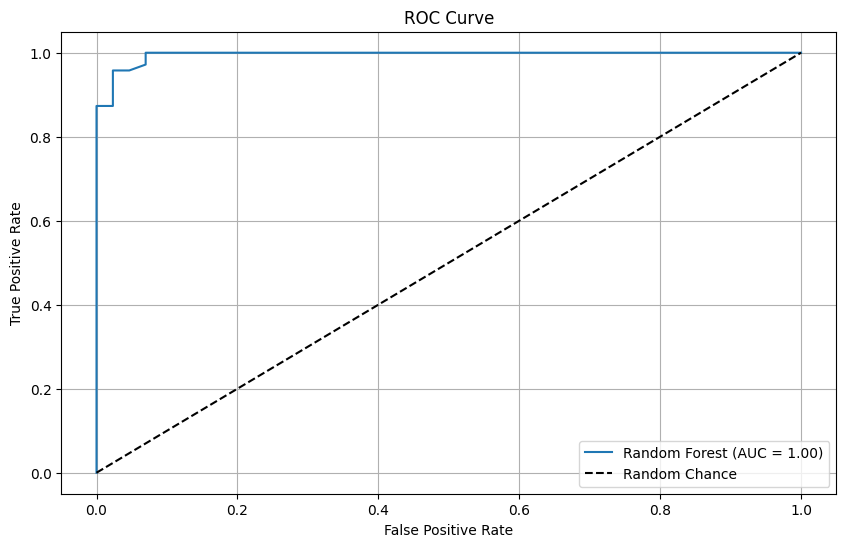

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score of Random Forest Classifier:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
#Q42 Train a Bagging Classifier and evaluate its performance using cross-validation

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

# Train a Bagging Classifier using Decision Tree as base estimator
bagging_classifier = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Evaluate performance using cross-validation
cv_scores = cross_val_score(bagging_classifier, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.9122807  0.92105263 0.98245614 0.95614035 1.        ]
Mean Cross-Validation Score: 0.9543859649122808


In [ ]:
#Q43 Train a Random Forest Classifier and plot the Precision-Recall curve

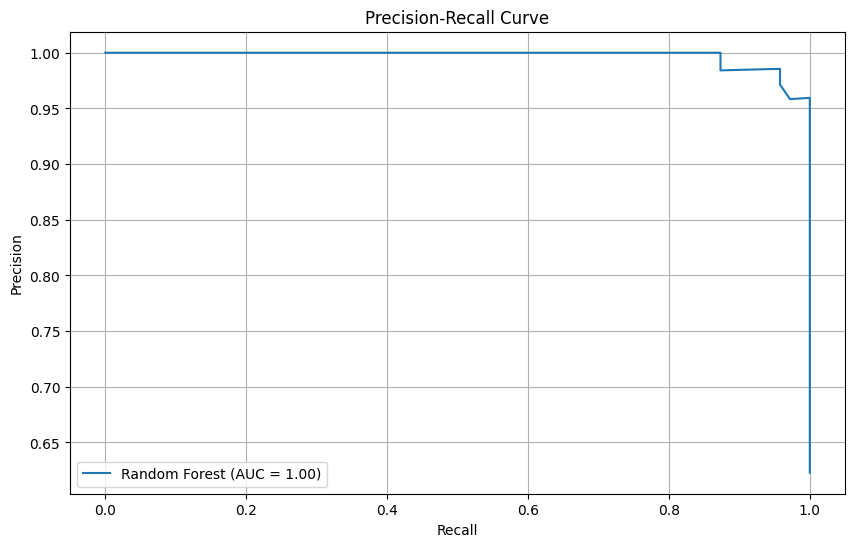

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities of the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Random Forest (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
#Q44 Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Define base estimators
estimators = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('logistic_regression', LogisticRegression(max_iter=10000))
]

# Define the Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_classifier.fit(X_train, y_train)

# Predict and evaluate the Stacking Classifier
y_pred_stacking = stacking_classifier.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy of Stacking Classifier:", accuracy_stacking)

# Train and evaluate individual classifiers for comparison
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Classifier:", accuracy_rf)

# Logistic Regression
lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression Classifier:", accuracy_lr)

# Compare the accuracies
print(f"Accuracy of Stacking Classifier: {accuracy_stacking:.4f}")
print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.4f}")
print(f"Accuracy of Logistic Regression Classifier: {accuracy_lr:.4f}")


Accuracy of Stacking Classifier: 0.9649122807017544
Accuracy of Random Forest Classifier: 0.9649122807017544
Accuracy of Logistic Regression Classifier: 0.956140350877193
Accuracy of Stacking Classifier: 0.9649
Accuracy of Random Forest Classifier: 0.9649
Accuracy of Logistic Regression Classifier: 0.9561


In [1]:
#Q45.  Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Different bootstrap sample sizes
bootstrap_sizes = [0.5, 0.7, 1.0]
mse_scores = []

# Train and evaluate Bagging Regressor with different bootstrap samples
for size in bootstrap_sizes:
    bagging_model = BaggingRegressor(
        base_estimator=DecisionTreeRegressor(),
        n_estimators=50,
        max_samples=size,
        bootstrap=True,
        random_state=42
    )

    bagging_model.fit(X_train, y_train)
    y_pred = bagging_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Bootstrap Sample Size: {size}, MSE: {mse:.4f}")

# Plot performance comparison
plt.figure(figsize=(6, 4))
plt.plot(bootstrap_sizes, mse_scores, marker='o', linestyle='-', color='blue')
plt.xlabel("Bootstrap Sample Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Bagging Regressor Performance with Different Bootstrap Sizes")
plt.grid()
plt.show()
